In [1]:
import os
import numpy as np
import pandas as pd 
import tensorflow as tf
import cv2

In [2]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Rescaling, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
DATA_PATH = '/kaggle/input/alphabetsarabicsl/AlphabetsArabicSL'
CATEGORIES = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
              'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
              'y', 'z', 'zz', 'zzz']
lmap = {'a': 'ا', 'b': 'ب', 'c': 'ت', 'd': 'ث', 'e': 'ج', 'f': 'ح',
        'g': 'خ', 'h': 'د','i': 'ذ', 'j': 'ر', 'k': 'ز', 'l': 'س',
        'm': 'ش', 'n': 'ص', 'o':'ض', 'p': 'ط', 'q': 'ظ', 
        'r': 'ع', 's': 'غ', 't': 'ف', 'u': 'ق', 'v':'ك', 
        'w':'ل', 'x': 'م','y': 'ن', 'z': 'ه', 'zz': 'و', 'zzz': 'ي'}
ar_alphabet = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح','خ', 'د','ذ', 'ر', 'ز', 'س',
        'ش', 'ص','ض', 'ط', 'ظ','ع', 'غ', 'ف', 'ق','ك','ل', 'م','ن', 'ه', 'و','ي']
IMG_WIDTH = 128
IMG_HEIGHT=128

In [4]:
video = cv2.VideoCapture('/kaggle/input/alphabetsarabicsl/AlphabetsArabicSL/a/VID20221203120156.mp4')
ret, frame = video.read()
frame.shape

(1920, 1080, 3)

In [5]:
X = []
y = []
count = []

def create_training_data():
    for category in CATEGORIES:
        k=0
        path = os.path.join(DATA_PATH, category)
        class_num = CATEGORIES.index(category)
        for vid in os.listdir(path)[:-1]:
            cap = cv2.VideoCapture(os.path.join(path, vid))
            while True:
                ret, frame = cap.read()
                if not ret:
                        break
                frame = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
                frame = frame[:, :, [2, 1, 0]]
                X.append(frame)
#                 X.append(frame/255)
                y.append(class_num)
                k += 1
            cap.release()
        print(class_num, end=' ')
        count.append([class_num, k])
        
create_training_data()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 

In [6]:
print(len(X))
print(len(y))
print(count)

36964
36964
[[0, 1269], [1, 1259], [2, 1266], [3, 1266], [4, 1462], [5, 1276], [6, 1275], [7, 1362], [8, 1206], [9, 1455], [10, 1221], [11, 1382], [12, 1237], [13, 1259], [14, 1430], [15, 1361], [16, 1472], [17, 1377], [18, 1419], [19, 1430], [20, 1253], [21, 1384], [22, 1104], [23, 1399], [24, 1294], [25, 1239], [26, 1269], [27, 1338]]


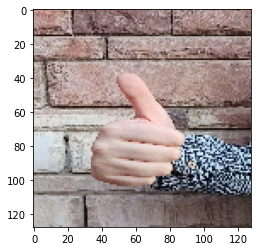

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[1000])
plt.show()

In [8]:
X = np.array(X)

In [9]:
y = np.array(y)

In [10]:
import gc

gc.collect()

3171

In [11]:
print("The shape of X is : ", X.shape)
print("The shape of y is : ", y.shape)

The shape of X is :  (36964, 128, 128, 3)
The shape of y is :  (36964,)


In [12]:
from sklearn.utils import shuffle
X, y =shuffle(X,y,random_state=20)

In [13]:
X_train, X_split, y_train, y_splitt = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
print(X_train.shape)
print(X_split.shape)
print(y_train.shape)
print(y_splitt.shape)

(25874, 128, 128, 3)
(11090, 128, 128, 3)
(25874,)
(11090,)


In [15]:
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_splitt, test_size=0.50, random_state=42)

In [16]:
y_train = to_categorical(y_train,28)
y_test = to_categorical(y_test,28)
y_valid = to_categorical(y_valid,28)

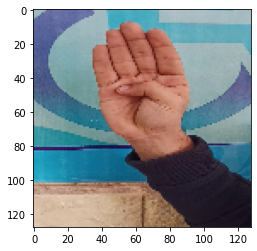

In [17]:
plt.imshow(X_train[200])
plt.show()

In [18]:
model = Sequential()

model.add(Conv2D(128, (5, 5), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(28, activation='softmax'))

model.summary()

2022-12-17 17:29:36.586404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 17:29:36.675305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 17:29:36.676110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 128)     9728      
_________________________________________________________________
activation (Activation)      (None, 124, 124, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

2022-12-17 17:29:36.677916: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 17:29:36.678211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 17:29:36.678899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 17:29:36.679539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [20]:
his=model.fit(X_train, y_train,epochs=10,batch_size=64,verbose=1,validation_data=(X_valid, y_valid),callbacks=[early_stop])

2022-12-17 17:29:38.975213: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1271758848 exceeds 10% of free system memory.
2022-12-17 17:29:40.452898: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1271758848 exceeds 10% of free system memory.
2022-12-17 17:29:41.493702: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-12-17 17:29:43.411164: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


405/405 [==============================] - ETA: 0s - loss: 1.6067 - accuracy: 0.4972 - precision: 0.7905 - recall: 0.3515

2022-12-17 17:30:05.600784: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 272547840 exceeds 10% of free system memory.
2022-12-17 17:30:05.925823: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 272547840 exceeds 10% of free system memory.


405/405 [==============================] - 26s 45ms/step - loss: 1.6067 - accuracy: 0.4972 - precision: 0.7905 - recall: 0.3515 - val_loss: 0.6390 - val_accuracy: 0.7753 - val_precision: 0.8639 - val_recall: 0.7077
Epoch 2/10
405/405 [==============================] - 17s 42ms/step - loss: 0.4283 - accuracy: 0.8524 - precision: 0.8965 - recall: 0.8140 - val_loss: 0.1279 - val_accuracy: 0.9607 - val_precision: 0.9668 - val_recall: 0.9555
Epoch 3/10
405/405 [==============================] - 17s 43ms/step - loss: 0.2515 - accuracy: 0.9125 - precision: 0.9327 - recall: 0.8965 - val_loss: 0.0747 - val_accuracy: 0.9782 - val_precision: 0.9815 - val_recall: 0.9744
Epoch 4/10
405/405 [==============================] - 17s 42ms/step - loss: 0.1601 - accuracy: 0.9460 - precision: 0.9565 - recall: 0.9362 - val_loss: 0.0755 - val_accuracy: 0.9827 - val_precision: 0.9875 - val_recall: 0.9803
Epoch 5/10
405/405 [==============================] - 17s 42ms/step - loss: 0.1256 - accuracy: 0.9566 - pre

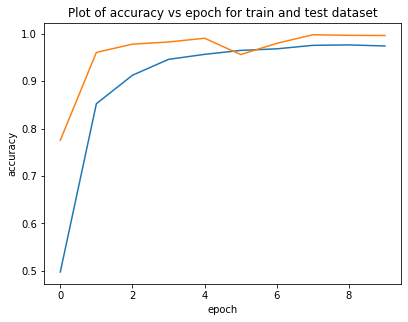

In [21]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

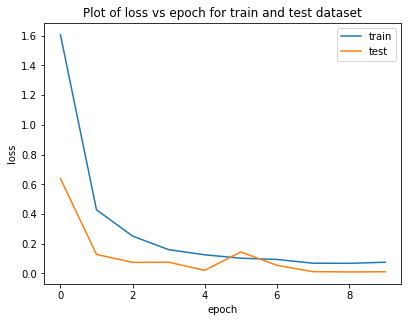

In [22]:
# Plot of loss vs epoch for train and test dataset
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model Evaluation

In [23]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
print(f'Test results - Precision: {test_results[2]*100} - Recall: {test_results[3]*100}%')

2022-12-17 17:32:59.901322: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 272547840 exceeds 10% of free system memory.


174/174 [==============================] - 2s 9ms/step - loss: 0.0138 - accuracy: 0.9964 - precision: 0.9966 - recall: 0.9962
Test results - Loss: 0.013758113607764244 - Accuracy: 99.63931441307068%
Test results - Precision: 99.65722560882568 - Recall: 99.62127804756165%


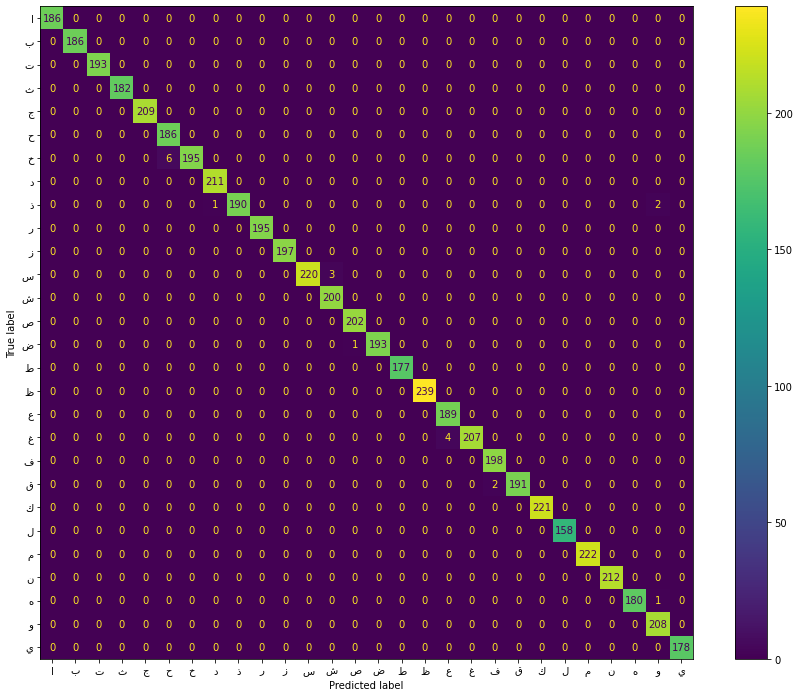

In [24]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_predictions = model.predict(X_test)
cm=confusion_matrix(y_test.argmax(axis=1),y_predictions.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ar_alphabet)

plt.rcParams["figure.figsize"] = 15, 12
disp.plot()
plt.show()


In [25]:
#Classification Report

from sklearn.metrics import classification_report

report = classification_report(y_test.argmax(axis=1),y_predictions.argmax(axis=1), target_names=ar_alphabet)
print(report)

              precision    recall  f1-score   support

           ا       1.00      1.00      1.00       186
           ب       1.00      1.00      1.00       186
           ت       1.00      1.00      1.00       193
           ث       1.00      1.00      1.00       182
           ج       1.00      1.00      1.00       209
           ح       0.97      1.00      0.98       186
           خ       1.00      0.97      0.98       201
           د       1.00      1.00      1.00       211
           ذ       1.00      0.98      0.99       193
           ر       1.00      1.00      1.00       195
           ز       1.00      1.00      1.00       197
           س       1.00      0.99      0.99       223
           ش       0.99      1.00      0.99       200
           ص       1.00      1.00      1.00       202
           ض       1.00      0.99      1.00       194
           ط       1.00      1.00      1.00       177
           ظ       1.00      1.00      1.00       239
           ع       0.98    

In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

n_classes = len(ar_alphabet)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(ar_alphabet)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

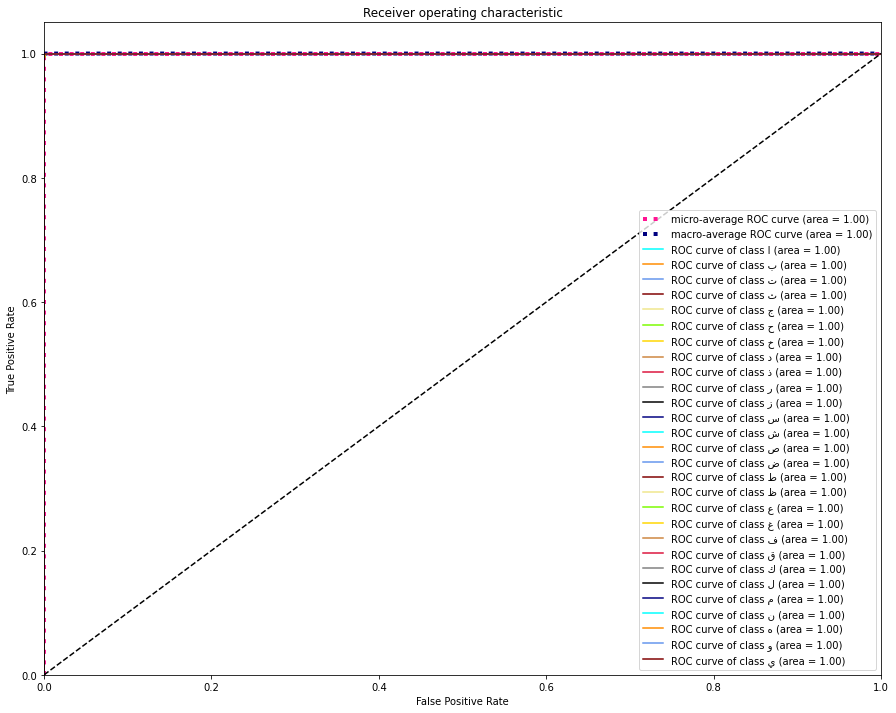

In [27]:
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "maroon","khaki", "lawngreen", "gold", "peru","crimson", "gray", "black", "navy"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label=f"ROC curve of class {ar_alphabet[i]} (area = {roc_auc[i]:0.2f})",
    )

plt.rcParams["figure.figsize"] = 15,12
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [28]:
model_name = 'ArabicAlphabetSL'
model.save(f"{model_name}.h5")

In [29]:
import tensorflow as tf
from tensorflow.keras.models import load_model

keras_model = load_model('/kaggle/working/ArabicAlphabetSL.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()
with open(f'{model_name}.tflite', 'wb') as f:
    f.write(tflite_model)

2022-12-17 17:33:08.386039: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-12-17 17:33:10.224881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 17:33:10.225291: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-12-17 17:33:10.226234: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-12-17 17:33:10.227484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 17:33:10.227921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne

In [30]:
del(X)
del(y)
del(X_train)
del(y_train)
gc.collect()

37415

#  Test II

In [33]:
final_X = []
final_y = []
final_count = []

def create_test_data():
    for category in CATEGORIES:
        k=0
        path = os.path.join(DATA_PATH, category)
        class_num = CATEGORIES.index(category)
        vid = os.listdir(path)[-1]
        cap = cv2.VideoCapture(os.path.join(path, vid))
        while True:
            ret, frame = cap.read()
            if not ret:
                    break
            frame = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
            frame = frame[:, :, [2, 1, 0]]
            final_X.append(frame)
#                 X.append(frame/255)
            final_y.append(class_num)
            k += 1
        cap.release()
        print(class_num, end=' ')
        final_count.append([class_num, k])
        
create_test_data()
print()
print(len(final_X))
print(len(final_y))
print(final_count)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
7159
7159
[[0, 308], [1, 302], [2, 311], [3, 322], [4, 156], [5, 343], [6, 318], [7, 153], [8, 308], [9, 150], [10, 350], [11, 150], [12, 327], [13, 314], [14, 154], [15, 150], [16, 148], [17, 149], [18, 144], [19, 151], [20, 333], [21, 160], [22, 314], [23, 147], [24, 447], [25, 343], [26, 352], [27, 355]]


In [36]:
final_X = np.array(final_X)
final_y = np.array(final_y)

In [38]:
from sklearn.utils import shuffle
final_X, final_y =shuffle(final_X,final_y,random_state=20)

In [41]:
final_y = to_categorical(final_y,28)

In [42]:
eval_results = keras_model.evaluate(final_X, final_y, verbose=1)
print(f'Test results - Loss: {eval_results[0]} - Accuracy: {eval_results[1]*100}%')
print(f'Test results - Precision: {eval_results[2]*100} - Recall: {eval_results[3]*100}%')

224/224 [==============================] - 3s 10ms/step - loss: 8.1420 - accuracy: 0.1531 - precision: 0.1553 - recall: 0.1449
Test results - Loss: 8.142029762268066 - Accuracy: 15.309400856494904%
Test results - Precision: 15.53092747926712 - Recall: 14.48526382446289%
